In [1]:
import numpy as np
import math

def create_gaussian_matrix(n, eps = 1.,  gain = 1., dim = 1, n_samples = 20, non_linearity = None):
    """
    Sample code from Ingrosso & Goldt, "Data-driven emergence of convolutional structure in neural networks"

    This function generates a matrix where each row is a sample drawn from a Gaussian (normal) distribution,
    and applies optional non-linearities. It is useful for tasks involving randomness,
    data simulation, or initializing parameters for machine learning models.

    Parameters:
        n (int):
            The number of features (columns) in the output matrix.

        eps (float, optional, default=1.0):
            A scaling factor for the Gaussian distribution's standard deviation,
            it modulates the correlations length in the samples
            The default standard deviation of 1.0 is multiplied by this value.

        gain (float, optional, default=1.0):
            A multiplicative factor applied to the entire output matrix,
            allowing for additional scaling after Gaussian generation.

        dim (int, optional, default=1):
            The dimensionality of the Gaussian samples. Can be 1 or 2.

        n_samples (int, optional, default=20):
            The number of samples (rows) to generate in the output matrix.

        non_linearity (string, optional, default=None):
            The name of the function that applies a non-linear transformation
            to the generated Gaussian samples. For now only erf is implemented.
            If `None`, no transformation is applied.

    Returns:
        numpy.ndarray:
            A 2D array of shape `(n_samples, n)` containing the generated and
            (optionally) transformed Gaussian data.

    Examples:
        >>> create_gaussian_matrix(n=5, eps=0.5, gain=2.0, n_samples=10)
        Generates a 10x5 matrix of Gaussian samples with standard deviation
        scaled by 0.5 and the result multiplied by 2.

        >>> create_gaussian_matrix(n=3, non_linearity="erf")
        Generates a 20x3 matrix of Gaussian samples, then applies the erf non-linearity.
    """

    cov = [[math.exp(-(abs(i - j)/(eps))**2) for i in range(n)] for j in range(n)]

    #1-dimensional
    if dim == 1:
        mean = [0] * n
        sample = np.random.multivariate_normal(mean, cov, size = n_samples, check_valid='warn')

    #2-dimensional
    elif dim == 2:
        mean = [0] * n**2
        cov = np.kron(cov, cov)
        sample = np.random.multivariate_normal(mean, cov, size = n_samples, check_valid='warn').reshape((n,n,n_samples))

    else:
        raise ValueError(f'Unexpected value of dimensions encountered: {dim}')


    if non_linearity is None:
        return sample

    elif non_linearity.lower() == "erf":
        Z = math.sqrt(2/math.pi * math.asin(gain**2/(1 + gain**2)))
        erf = np.vectorize(math.erf)
        sample = erf(gain*sample/math.sqrt(2)) / Z
        return sample

    else:
        raise ValueError(f'Unexpected non-linearity encountered "{non_linearity}"')

In [2]:
X = create_gaussian_matrix(20, dim = 2, eps = 1.2, gain = 1)

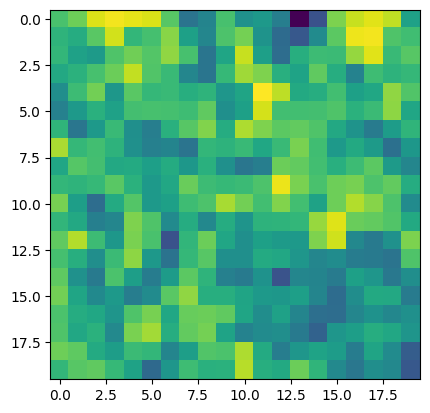

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X[0])
plt.show()